# Import tensorflow libraries

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras import backend as K 
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [60]:
!ls '/drive/My Drive/Fusemachines Nepal/opencv'
!cp '/drive/My Drive/Fusemachines Nepal/opencv/Train.tar.gz' ./

!ls '/drive/My Drive/Fusemachines Nepal/opencv'
!cp '/drive/My Drive/Fusemachines Nepal/opencv/Test.tar.gz' ./



DataDescription.docx  Test.tar.gz  Train.tar.gz     Untitled.ipynb
test		      train	   Untitled0.ipynb
DataDescription.docx  Test.tar.gz  Train.tar.gz     Untitled.ipynb
test		      train	   Untitled0.ipynb


In [61]:
!uname

Linux


In [62]:
!mkdir train
!mkdir test

mkdir: cannot create directory ‘train’: File exists
mkdir: cannot create directory ‘test’: File exists


In [0]:
!tar -xf Test.tar.gz -C test/
!tar -xf Train.tar.gz -C train//


In [0]:

df = pd.read_csv('./train/testset.csv')
df_test = pd.read_csv('./test/testset.csv')


# Data Analysis

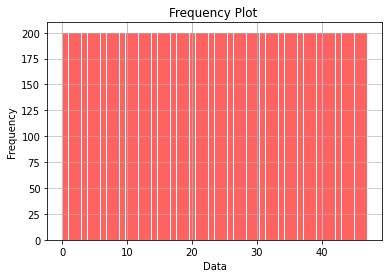

In [65]:
t = df['Label']

t.plot.hist(grid=True, bins=48, rwidth=0.9,
                   color='#ff6361')
plt.title('Frequency Plot ')
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

## interpretation
From above we can say that we have a balance dataset.



# Image Augumentation

Image augmentation artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc.

In [67]:

train_datagen=ImageDataGenerator(preprocessing_function=lambda x: (x / 127.5)-1)

df_test['Label'] = df_test['Label'].astype(str)
df['Label'] = df['Label'].astype(str)
train_generator = train_datagen.flow_from_dataframe(
    df, directory='./train/testset', x_col='Data', y_col='Label',
    target_size=(224, 224)
)
test_generator = train_datagen.flow_from_dataframe(
    df_test, directory='./test/testset', x_col='Data', y_col='Label',
    target_size=(224, 224)
)


Found 9600 validated image filenames belonging to 48 classes.
Found 2609 validated image filenames belonging to 48 classes.


# Transfar Learning

MobileNetV2 to power the next generation of mobile vision applications.
 MobileNetV2 is released as part of TensorFlow-Slim Image Classification Library.

In [0]:
base_model=MobileNetV2(input_shape=(224, 224, 3), include_top = False, weights = 'imagenet')

# MobileNetV2 Convolutional Blocks



![alt text](https://miro.medium.com/max/1400/1*bqE59FvgpvoAQUMQ0WEoUA.png)

In [69]:
feature_batch = base_model(train_generator[0])
print(feature_batch.shape)

(32, 7, 7, 1280)


In [0]:
base_model.trainable = False

In [0]:
global_average_layer = GlobalAveragePooling2D()


## Prediction_layer

In [0]:
prediction_layer = Dense(48,activation ='softmax')

In [0]:
model = Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 48)                61488     
Total params: 2,319,472
Trainable params: 61,488
Non-trainable params: 2,257,984
_________________________________________________________________


In [76]:
model.fit(train_generator,epochs=20)

Epoch 1/20
300/300 [==============================] - 42s 138ms/step - loss: 3.8746 - accuracy: 0.0452
Epoch 2/20
300/300 [==============================] - 42s 139ms/step - loss: 3.5857 - accuracy: 0.0977
Epoch 3/20
300/300 [==============================] - 41s 138ms/step - loss: 3.3743 - accuracy: 0.1550
Epoch 4/20
300/300 [==============================] - 42s 139ms/step - loss: 3.1733 - accuracy: 0.2120
Epoch 5/20
300/300 [==============================] - 42s 138ms/step - loss: 2.9977 - accuracy: 0.2675
Epoch 6/20
300/300 [==============================] - 42s 138ms/step - loss: 2.8425 - accuracy: 0.3156
Epoch 7/20
300/300 [==============================] - 42s 139ms/step - loss: 2.7090 - accuracy: 0.3504
Epoch 8/20
300/300 [==============================] - 43s 142ms/step - loss: 2.5852 - accuracy: 0.3696
Epoch 9/20
300/300 [==============================] - 42s 140ms/step - loss: 2.4712 - accuracy: 0.4149
Epoch 10/20
300/300 [==============================] - 42s 141ms/step - l

In [77]:
model.evaluate(test_generator)

82/82 [==============================] - 11s 137ms/step - loss: 1.6545 - accuracy: 0.6328


[1.6545090675354004, 0.6328095197677612]

In [0]:
pred=model.predict(test_generator)

In [0]:
import numpy as np

predicted_class_indices=np.argmax(pred,axis=1)

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [0]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results1.csv",index=False)

In [86]:
pd.read_csv('./results1.csv')

,Filename,Predictions
0,632755.jpeg,16
1,496855.jpeg,19
2,155390.jpeg,32
3,265013.jpeg,3
4,496360.jpeg,16
...,...,...
2604,542827.jpeg,23
2605,962019.jpeg,31
2606,518649.jpeg,47
2607,299155.jpeg,16
